# 五月天在唱什么？
## 我从 QQ 音乐上爬取了五月天 689 首音乐的全套歌词

In [40]:
# 获取全部歌曲，五月天的 mid 是 000Sp0Bz4JXH0o 歌曲数据存储到 《五月天歌曲.csv》 中
import requests
import pandas as pd

payload={}
headers = {}

songs_file = "五月天歌曲.csv"

mid = "000Sp0Bz4JXH0o"

def query_songs(mid, begin):
    url = 'https://u.y.qq.com/cgi-bin/musicu.fcg?-=getSingerSong8235365887193979&g_tk=5381&loginUin=0&hostUin=0&format=json&inCharset=utf8&outCharset=utf-8&notice=0&platform=yqq.json&needNewCode=0&data={"comm":{"ct":24,"cv":0},"singerSongList":{"method":"GetSingerSongList","param":{"order":1,"singerMid":"%s","begin": %d,"num":100},"module":"musichall.song_list_server"}}' % (mid,begin)
    response = requests.request("GET", url, headers=headers, data=payload)
    data = response.json()['singerSongList']['data']['songList'] 
    df = pd.json_normalize(data)
    if len(df) == 100:
        return pd.concat([df,query_songs(mid, begin+100)], ignore_index=True)
    return df

songs = query_songs(mid, 0)
songs.to_csv(songs_file)
songs

,songInfo.id,songInfo.type,songInfo.mid,songInfo.name,songInfo.title,songInfo.subtitle,songInfo.singer,songInfo.album.id,songInfo.album.mid,songInfo.album.name,...,songInfo.aid,songInfo.ppurl,songInfo.tid,songInfo.ov,songInfo.sa,songInfo.es,songInfo.vs,songInfo.vi,songInfo.ktag,songInfo.vf
0,447807,0,002M8hNI2QgtRY,突然好想你,突然好想你,,"[{'id': 74, 'mid': '000Sp0Bz4JXH0o', 'name': '...",36459,0020I7sO0ayXhN,后青春期的诗,...,0,,0,0,17408,,"[063Q13q73VCXkj, , , 000Fci2Z2fis1H, , , , , , ]",[357],0,"[-7.403904, 0.999969, 12.557802]"
1,107709592,0,0022QuVR1LcRHN,后来的我们,后来的我们,,"[{'id': 74, 'mid': '000Sp0Bz4JXH0o', 'name': '...",1393445,002fRO0N4FftzY,自传,...,0,,0,0,17408,,"[063tNNRu07eskw, , , 002Cz3XN19RZL2, 003c09Zq1...",[357],0,"[-12.381754, 0.999969, 9.231934]"
2,5131923,0,003lhef916qYN2,步步,步步,《步步惊情》电视剧主题曲,"[{'id': 74, 'mid': '000Sp0Bz4JXH0o', 'name': '...",451706,0006MmDz4Hl2Ud,步步 自选作品辑 the Best of 1999-2013,...,0,,0,0,17408,,"[0628fjz41hvhLN, , , 001H8zEb4QTnp8, 003mplLQ0...",[357],0,"[-9.560877, 0.999969, 5.856909]"
3,235883438,0,0035sVym0anwc4,玫瑰少年,玫瑰少年,,"[{'id': 74, 'mid': '000Sp0Bz4JXH0o', 'name': '...",7353318,001YhoWf2XcCS7,玫瑰少年,...,0,,0,0,1024,,"[062R9e5614BXJq, , , 002zATys1DpXq7, 003SzoGj3...",[357],0,"[-9.105791, 0.977844, 7.71236]"
4,1056871,0,004LlhsV2NmnVY,我不愿 让你一个人,我不愿 让你一个人,《真爱找麻烦》电视剧片尾曲,"[{'id': 74, 'mid': '000Sp0Bz4JXH0o', 'name': '...",88493,001fbipy4azgKM,第二人生（明日版）,...,0,,0,0,1024,,"[063VInb63lK3w5, , , 003900DW0OsmCH, 001hVujj4...",[357],0,"[-8.31992, 0.999969, 13.649755]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,390256590,0,002GdPqE3QYKP5,童话|所有相爱的人呐|笑忘歌,童话|所有相爱的人呐|笑忘歌 (Live),,"[{'id': 51, 'mid': '003jJGvv3C82KZ', 'name': '...",0,,,...,0,,0,0,0,,"[, 001TraZW0nSjfH, , 001g9nWH3nTchO, , , , , , ]",[0],0,"[-2.210941, 0.699524, 11.158588]"
685,345474078,0,002q6p990eVMyj,天天想你,天天想你,,"[{'id': 74, 'mid': '000Sp0Bz4JXH0o', 'name': '...",0,,,...,0,,0,0,0,,"[, , , , , , , , , ]",[0],0,"[0, 0, 0]"
686,267554887,0,000mCtfW3djOBr,一千个世纪（为爱而生 Live）,一千个世纪（为爱而生 Live）,,"[{'id': 74, 'mid': '000Sp0Bz4JXH0o', 'name': '...",12765064,001iZ2tZ4OCax1,Mayday and You,...,0,,0,0,0,,"[, , , , , , , , , ]",[0],0,"[0, 0, 0]"
687,241727069,0,003TEuPo0EU5oK,由我们主宰 The World Is Ours,由我们主宰 The World Is Ours,,"[{'id': 74, 'mid': '000Sp0Bz4JXH0o', 'name': '...",8587872,001sUIn63gXypd,由我们主宰 The World Is Ours,...,0,,0,0,0,,"[, , , , , , , , , ]",[0],0,"[0, 0, 0]"


In [41]:
# 下载每一首歌的歌词，歌词被 base64 编码了，需要解码一下
import base64

def query_lyric(musicid, mid):
    url = "https://c.y.qq.com/lyric/fcgi-bin/fcg_query_lyric_yqq.fcg?musicid={}&format=json".format(musicid)
    payload={}
    headers = {
        'referer': 'https://y.qq.com/n/yqq/song/{}.html'.format(mid)
    }
    response = requests.request("GET", url, headers=headers, data=payload)
    try:
        decoded_bytes = base64.b64decode(response.json()['lyric'])
    except Exception as e:
        print(e)
        return ''
    return decoded_bytes.decode('utf-8')
l = query_lyric(232577704, '003OenHi29g7Go')  
print(l)

[ti:后来的我们 (Life Live)]
[ar:五月天]
[al:五月天 人生无限公司 Life Live 完整收录篇]
[by:]
[offset:0]
[00:00.28]后来的我们 (Life Live) - 五月天
[00:01.47]词：阿信
[00:01.74]曲：怪兽
[00:02.31]编曲：五月天/百田留衣
[00:02.63]钢琴演奏：周恒毅
[00:02.83]MIDI 编写：百田留衣
[00:03.07]弦乐演奏：李琪北京室内乐团
[00:03.46]和声编写：可乐 Cola Kai
[00:03.73]和声演唱：可乐 Cola Kai/阿璞 (八三夭)/黄士杰
[00:04.29]OP：蒙斯特音乐工作室
[00:04.58]SP：相信音乐国际股份有限公司
[00:05.01]OP：认真工作室
[00:05.21]SP：相信音乐国际股份有限公司
[00:15.16]然后呢
[00:18.51]他们说你的心 似乎痊愈了
[00:24.46]也开始有个人 为你守护着
[00:30.53]我该心安或是 心痛呢
[00:36.27]然后呢
[00:39.62]其实我的日子 也还可以呢
[00:45.41]除了回忆肆虐 的某些时刻
[00:51.40]庆幸还有眼泪 冲淡苦涩
[00:59.25]而那些昨日 依然缤纷着
[01:05.19]它们都有我 细心收藏着
[01:11.21]也许你还记得 也许你都忘了
[01:16.90]也不是那么 重要了
[01:22.90]只期待 后来的你 能快乐
[01:29.41]那就是 后来的我 最想的
[01:35.77]后来的我们 依然走着
[01:39.77]只是不再并肩了
[01:42.71]朝各自的人生 追寻了
[01:48.25]亲爱的
[01:51.75]回忆我们共同 走过的曲折
[01:57.50]是那些带我们 来到了这一刻
[02:03.33]让珍贵的人生 有失有得
[02:10.89]用新的幸福 把遗憾包着
[02:17.09]就这么朝着 未来前进了
[02:23.26]有再多的不舍 也要狠心割舍
[02:29.19]别回头看我 亲爱的
[02:34.97]只期待 后来的你 能快乐
[02:41.36]那就是 后来的我 最想的
[02:47.39]后来的我们 依然走着
[02:51.70]只是

In [42]:
# 用正则表达式解析出每一首歌的歌词详细内容
import re
def parse_lyrics_string(lyrics_string):    
    matches = re.findall(r'\[\d{2}:\d{2}\.\d{2}\](.*)', lyrics_string.replace('\r', ''))
    return [x for x in matches if x != '']


parse_lyrics_string(l)[0:10]

['后来的我们 (Life Live) - 五月天',
 '词：阿信',
 '曲：怪兽',
 '编曲：五月天/百田留衣',
 '钢琴演奏：周恒毅',
 'MIDI 编写：百田留衣',
 '弦乐演奏：李琪北京室内乐团',
 '和声编写：可乐 Cola Kai',
 '和声演唱：可乐 Cola Kai/阿璞 (八三夭)/黄士杰',
 'OP：蒙斯特音乐工作室']

In [43]:
# 从 《五月天歌曲列表.csv》 中拿到全部歌曲
# 然后逐一获取歌词
# 最后存储到 《五月天歌词.csv》
# 注意，全部获取 689 首太慢，这里指定了一个 n 参数，来表达最多获取 n 首歌。
n = 6
df = pd.read_csv(songs_file)
docs = pd.DataFrame(columns=['title','lyrics', 'time_public'])
for index, row in df.iterrows():
    l = query_lyric(row['songInfo.id'], row['songInfo.mid'])
    if len(docs) > n:
        break
    docs = pd.concat([docs, pd.DataFrame({'title': row['songInfo.title'], 'lyrics': ' '.join(parse_lyrics_string(l)), 'time_public': row['songInfo.time_public']}, index=[0])],ignore_index=True)
docs.to_csv('五月天歌词{}.csv'.format(n))

In [44]:
# 这个函数是赠送的，可以获取五月天歌曲的评论
def query_comment(song_id, pagenum):
    url = "https://c.y.qq.com/base/fcgi-bin/fcg_global_comment_h5.fcg?biztype=1&topid={}&cmd=8&pagenum={}&pagesize=25".format(song_id, pagenum)
    payload={}
    headers = {}
    response = requests.request("GET", url, headers=headers, data=payload)
    data = response.json()['comment']['commentlist']
    return pd.json_normalize(data)

query_comment(447807, 0).to_csv("447807.comment.csv")

# 然后言归正传，看看五月天在唱什么？

In [57]:
!pip install jieba wordcloud

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 8.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314458 sha256=5a1da17521a4fc8ae5d71f6d4fbba2bf611acbda04104405c62d34e6ca025704
  Stored in directory: /Users/zhangpenghao/Library/Caches/pip/wheels/37/08/79/ea7c0d2ca823affa13f89586a5a9eff8dd6ad589640396e1b5
Successfully built jieba


In [116]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import jieba.posseg as pseg

lrcs = pd.read_csv('五月天歌词.csv')
stopwords = ['五月天', '阿信', '国际','股份', '工作室', '电脑', '编曲','词', '音乐', '有限公司', '弦乐', '歌', '让', 'Live', 'yeah', '啦', '有', '会', '到', '是', '像', '要', '想', '说', '去', '好']

# 形容词：看情感

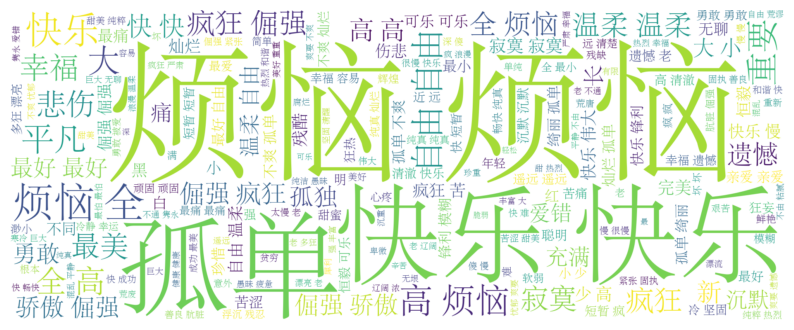

In [117]:
arr = []
for index, row in lrcs.iterrows():
    try:
        words = pseg.cut(row['lyrics'], use_paddle=True) # 使用paddle模式
        for word, flag in words:
            if flag in ('a'):
                arr.append(word)
    except Exception as e:
        pass
wc = WordCloud(background_color="white",# 设置背景颜色
           # max_words=50, # 词云显示的最大词数
           stopwords=stopwords, # 设置停用词
           width = 2000,height=800,
           # mask=np.array(Image.open("./阿信.jpeg")),
           font_path='STSong.ttf', # 兼容中文字体，不然中文会显示乱码
           )
# 生成词云 
wc.generate(' '.join(arr))

# 显示图像
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
# interpolation='bilinear' 表示插值方法为双线性插值
plt.axis("off")# 关掉图像的坐标
plt.show()

# 名词：看理想

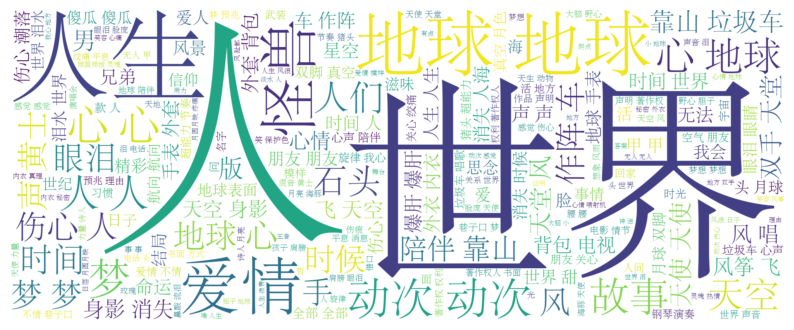

In [118]:
arr = []
for index, row in lrcs.iterrows():
    try:
        words = pseg.cut(row['lyrics'], use_paddle=True) # 使用paddle模式
        for word, flag in words:
            if flag in ('n'):
                arr.append(word)
    except Exception as e:
        pass
wc = WordCloud(background_color="white",# 设置背景颜色
           # max_words=50, # 词云显示的最大词数
           stopwords=stopwords, # 设置停用词
           width = 2000,height=800,
           # mask=np.array(Image.open("./阿信.jpeg")),
           font_path='STSong.ttf', # 兼容中文字体，不然中文会显示乱码
           )
# 生成词云 
wc.generate(' '.join(arr))

# 显示图像
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
# interpolation='bilinear' 表示插值方法为双线性插值
plt.axis("off")# 关掉图像的坐标
plt.show()

# 时间：看情绪

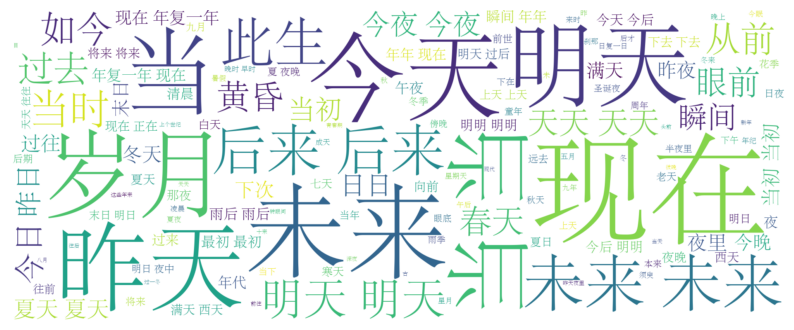

In [119]:
arr = []
for index, row in lrcs.iterrows():
    try:
        words = pseg.cut(row['lyrics'], use_paddle=True) # 使用paddle模式
        for word, flag in words:
            if flag in ('t'):
                arr.append(word)
    except Exception as e:
        pass
wc = WordCloud(background_color="white",# 设置背景颜色
           # max_words=50, # 词云显示的最大词数
           stopwords=stopwords, # 设置停用词
           width = 2000,height=800,
           # mask=np.array(Image.open("./阿信.jpeg")),
           font_path='STSong.ttf', # 兼容中文字体，不然中文会显示乱码
           )
# 生成词云 
wc.generate(' '.join(arr))

# 显示图像
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
# interpolation='bilinear' 表示插值方法为双线性插值
plt.axis("off")# 关掉图像的坐标
plt.show()

# 歌曲发行年份

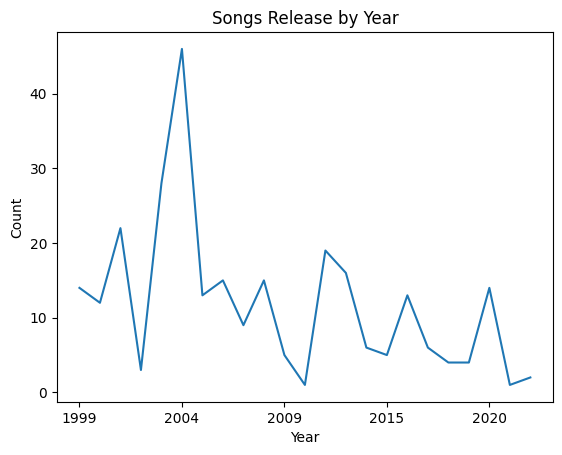

In [120]:
filter_songs = songs[~songs['songInfo.title'].str.contains('Live')]
filter_songs = filter_songs[~filter_songs['songInfo.title'].str.contains('伴奏')]
filter_songs['year'] = filter_songs['songInfo.album.time_public'].str.extract(r'(\d{4})')
# 统计每个年份的出现次数
counts = filter_songs['year'].value_counts().sort_index()

# 绘制折线图
counts.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Songs Release by Year')
plt.show()

In [121]:
print(len(filter_songs))

318


In [131]:
filter_songs[filter_songs['year'] == '2004'][['songInfo.title', 'songInfo.album.title']]

,songInfo.title,songInfo.album.title
7,倔强,神的孩子都在跳舞
49,孙悟空,神的孩子都在跳舞
80,让我照顾你,神的孩子都在跳舞
96,约翰蓝侬,神的孩子都在跳舞
100,超人,神的孩子都在跳舞
123,错错错,神的孩子都在跳舞
130,温柔 (还你自由版),音乐电影-五月之恋
138,回来吧,神的孩子都在跳舞
139,垃圾车,神的孩子都在跳舞
181,圣诞夜惊魂,神的孩子都在跳舞
